# Working with Imbalanced Data

- When the target column in a dataset has a significantly lower proportion of one class over the other:
  - The class with higher proportion is called the **majority class**
  - The class with lower proportion is called the **minority class**
- Examples:
  - in medical diagnosis, you may have 95% of patients without a disease (negative class) and only 5% with the disease (positive class)
  - in fraud detection, we have more non-fraudlent activity that fraudulent
- Imbalanced data may cause issues because:
  - Difficulty in predicting the minority class because the model tends to favor the majority class and it doesn't have enough instances/examples of the minority class
  - Skewed performance metrics: Evalaution metrics like accuracy can be misleading.
- To address this issue:
  - Gather more data: collecting or requesting additional data to improve the representation of the minority class
  - Synthetically improving the data: adjusting the distributino of the data by doing one of the following:
    - **Oversampling** increasing the size of the minority class
    - **Undersampling** decreasing the size of the majority
- One of the most popular oversampling technique is **SMOTE** (Synthetic Minority Oversampling Technique)
  - Focusing on the minority data
  - Genrating synthetic data points based on common features and patterns observed within the minority class
  - It creates new instances by analyzing the **nearest neighbor**

  

![smote](https://miro.medium.com/v2/resize:fit:850/1*QaNfJwU6P-VnG1zp3U4cVg.png)

Advantages:
- Balances the class distribution  (the minority data has more data points for the ML model to learn from)
- Fast performance and effectiveness

Disadvantages:
- May cause overfitting
- It's hard to ensure that the synthetic data properly represent the original data

Recommendation
- Consider oversampling when you have poor model performance and the ratio 70:30 (maybe), 80:20 or 85:15 (recommended)
- It's hihgly recommended to remove ourliers before doing SMOTE

`pip install imblearn`

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

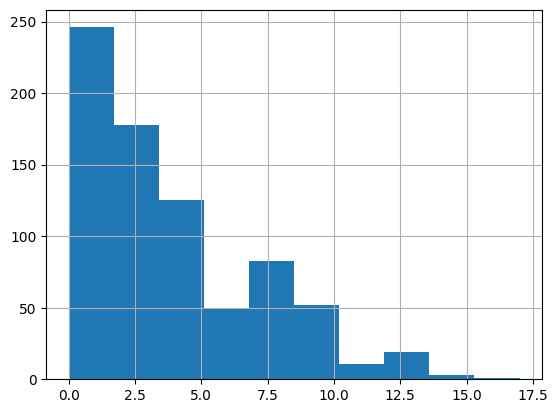

In [ ]:
df['Pregnancies'].hist()

Yes, historically, Pima Indian women have been observed to have higher fertility rates compared to the general U.S. population. This is evident in datasets such as the Pima Indians Diabetes Dataset, which is commonly used in machine learning and statistics.


In [ ]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


<Axes: ylabel='Outcome'>

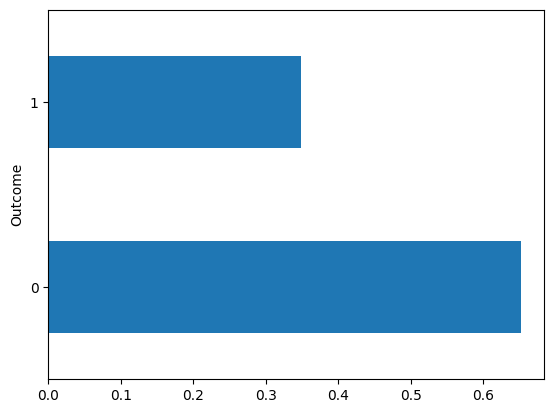

In [ ]:
df['Outcome'].value_counts(normalize=True).plot(kind='barh')

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: xlabel='Age', ylabel='Count'>

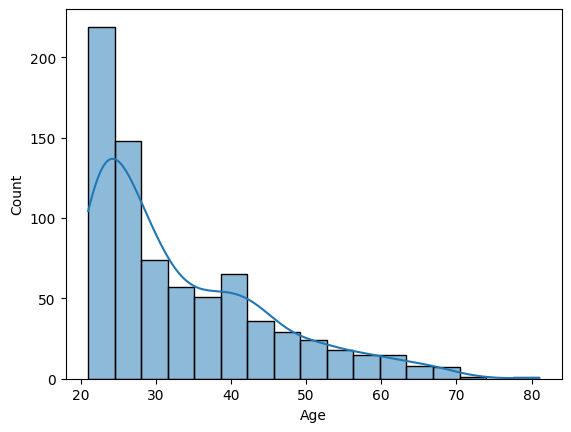

In [ ]:
sns.histplot(data=df, x='Age', kde=True)

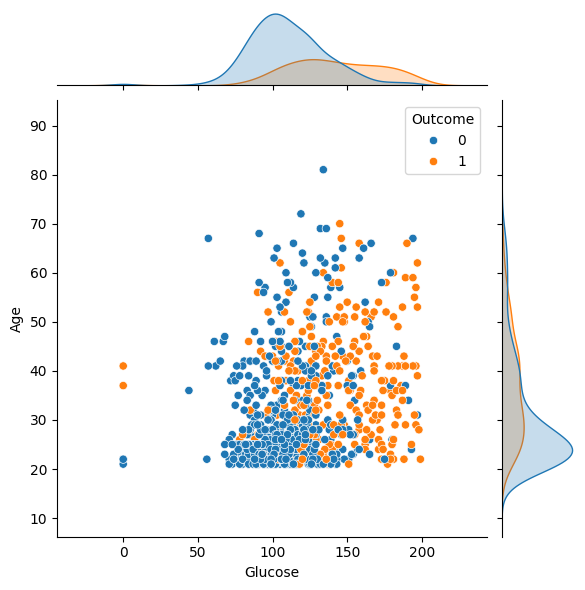

In [ ]:
sns.jointplot(data=df, x='Glucose', y='Age', hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

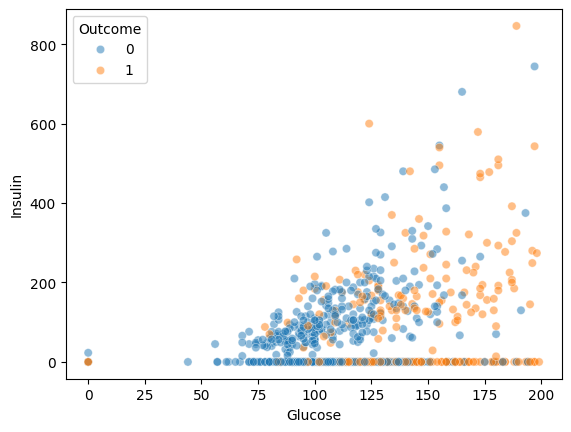

In [ ]:
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', alpha=0.5)

<Axes: xlabel='Age', ylabel='BMI'>

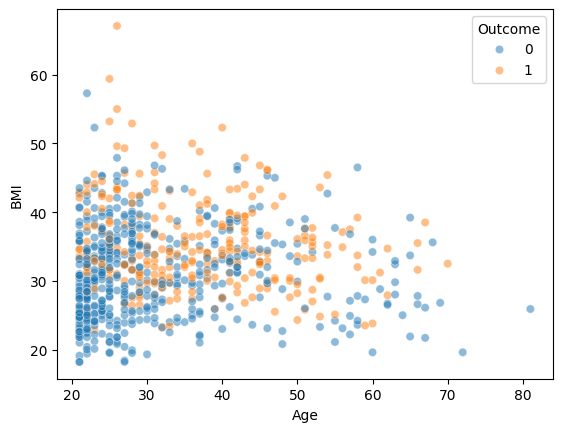

In [ ]:
#removing 0 BMI because it doesn't make sense - it's missing data
sns.scatterplot(data=df[df['BMI']>0], x='Age', y='BMI', hue='Outcome', alpha=0.5)

In [ ]:
# check for the ratio of missing values (labled as 0)
len(df[df['BMI']==0])/len(df)

0.014322916666666666

In [ ]:
df_org = df.copy()

In [ ]:
df = df[df['BMI']>0]

Performing SMOTE

In [ ]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

In [ ]:
smote_model = SMOTE(random_state=10)

In [ ]:
X_resam, y_resam = smote_model.fit_resample(X, y)

In [ ]:
print('Before SMOTE:', X.shape)
print('After SMOTE:', X_resam.shape)

Before SMOTE: (757, 8)
After SMOTE: (982, 8)


<Axes: ylabel='Outcome'>

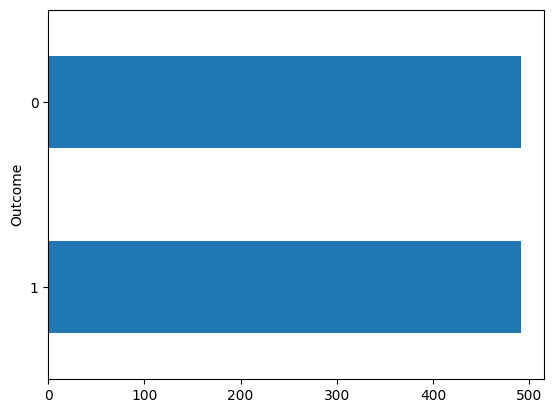

In [ ]:
y_resam.value_counts().plot(kind='barh')

- Consider controling the ratio of upsampling using `sampling_strategy` attribute
- You can also control the number of neighbors to consider for themintority sythetic data using `k_neighbors`

![knn](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png)

## Train kNN Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X_resam, y_resam, test_size=.2, random_state=10)

> Note: make sure you're using the oversampled data if you want to leverage SMOTE in the model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4) #k is a hyperparamter
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print('kNN Model Accuracy:', accuracy_score(y_test, y_pred))

kNN Model Accuracy: 0.6852791878172588


In [ ]:
param_grid = {
            'n_neighbors':[3,4,5,6],
            'metric':['euclidean', 'manhattan']
            }

![ds](https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=jpeg)

In [ ]:
#defining a stratified balanced data selection
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [ ]:
# using StratifiedKFold as the cross-validation method in gridsearch
gs_model = GridSearchCV(estimator=KNeighborsClassifier(), cv=skf, param_grid=param_grid)

In [ ]:
gs_model.fit(X_resam, y_resam)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6]})

In [ ]:
print('Best Parameters:', gs_model.best_params_)
print('Best Score:', gs_model.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4}
Best Score: 0.7627628716461203


## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under_sam = RandomUnderSampler(random_state=10)

In [ ]:
X_und_sam, y_und_sam = under_sam.fit_resample(X, y)

<Axes: ylabel='Outcome'>

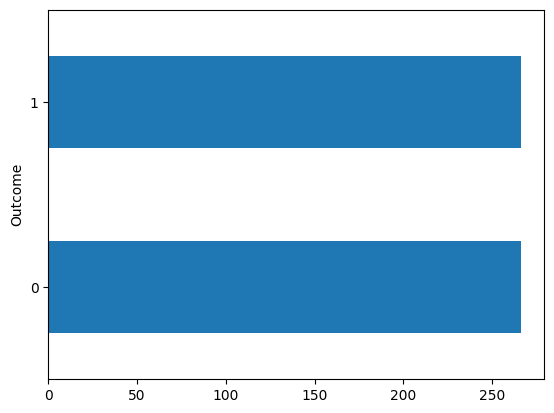

In [ ]:
y_und_sam.value_counts().plot(kind='barh')